In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


## Import dependencies

In [4]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from IPython.display import display

from configs.models_config_for_tuning import MODELS_CONFIG
from source.utils.custom_initializers import create_config_obj, create_models_config_from_tuned_params_df
from source.custom_classes.metrics_composer import MetricsComposer
from source.custom_classes.metrics_visualizer import MetricsVisualizer

sns.set_theme(style="whitegrid")

## Create average metrics files

In [5]:
config = create_config_obj(config_yaml_path=os.path.join('configs', 'experiment1_folktables_GA_2018_config.yaml'))

TUNED_PARAMS_FILE_PATH = os.path.join('results', 'models_tuning', f'tuning_results_{config.dataset_name}_20230117__023240.csv')
models_tuned_params_df = pd.read_csv(TUNED_PARAMS_FILE_PATH)

experiment_models_config = create_models_config_from_tuned_params_df(
    models_config_for_tuning=MODELS_CONFIG,
    models_tuned_params_df=models_tuned_params_df,
)

In [6]:
METRICS_PATH = os.path.join('results', 'hypothesis_space', 'Folktables_GA_2018_Metrics_20230123__234401')
# METRICS_PATH = os.path.join('results', 'hypothesis_space', 'COMPAS_Without_Sensitive_Attributes_Metrics_20230122__202033')
# MODELS_NAMES = [model_config['model_name'] for model_config in config.MODELS_CONFIG if 'MLPClassifier' not in model_config['model_name']]
MODELS_NAMES = list(experiment_models_config.keys())
MODELS_NAMES

['DecisionTreeClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'XGBClassifier',
 'KNeighborsClassifier']

In [7]:
visualizer = MetricsVisualizer(METRICS_PATH, config.dataset_name, MODELS_NAMES, config.sensitive_attributes_dct)

In [8]:
visualizer.models_average_metrics_dct[MODELS_NAMES[0]].head(20)

,Metric,Model_Name,overall,SEX_priv,SEX_dis,RAC1P_priv,RAC1P_dis,SEX&RAC1P_priv,SEX&RAC1P_dis
0,Accuracy,DecisionTreeClassifier,0.820625,0.853594,0.790123,0.818474,0.824771,0.851457,0.796568
1,Entropy,DecisionTreeClassifier,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,F1,DecisionTreeClassifier,0.805340,0.847279,0.763430,0.807144,0.801473,0.852008,0.773699
3,FNR,DecisionTreeClassifier,0.159154,0.153058,0.165800,0.167130,0.141973,0.161923,0.151410
4,FPR,DecisionTreeClassifier,0.195028,0.139955,0.239762,0.193301,0.198450,0.134134,0.239175
5,General_Ensemble_Accuracy,DecisionTreeClassifier,0.820625,0.853594,0.790123,0.818474,0.824771,0.851457,0.796568
6,IQR,DecisionTreeClassifier,0.058359,0.060905,0.055911,0.059253,0.056626,0.062643,0.055988
7,Jitter,DecisionTreeClassifier,0.046965,0.036471,0.056638,0.045702,0.049492,0.035745,0.059178
8,Label_Stability,DecisionTreeClassifier,0.939400,0.952534,0.927285,0.940884,0.936426,0.953394,0.924382
9,Mean,DecisionTreeClassifier,0.552242,0.524469,0.578070,0.544466,0.567473,0.507939,0.574851


## Visualize average metrics

In [9]:
# Example of MetricsComposer usage
metrics_composer = MetricsComposer(config.sensitive_attributes_dct,
                                   visualizer.models_average_metrics_dct['DecisionTreeClassifier'])
metrics_composer.compose_metrics()

,Metric,SEX,RAC1P,SEX&RAC1P
0,Equalized_Odds_TPR,-0.012743,0.025157,0.010513
1,Equalized_Odds_FPR,0.099807,0.005149,0.105041
2,Disparate_Impact,1.186251,1.072521,1.233786
3,Statistical_Parity_Difference,0.186103,0.077146,0.226148
4,Accuracy_Parity,-0.063471,0.006297,-0.054889
5,Label_Stability_Ratio,0.973493,0.995263,0.969570
6,IQR_Parity,-0.004994,-0.002627,-0.006654
7,Std_Parity,-0.003123,-0.002352,-0.005256
8,Std_Ratio,0.944794,0.957824,0.908374
9,Jitter_Parity,0.020168,0.003789,0.023432


### Overall metrics visualizations

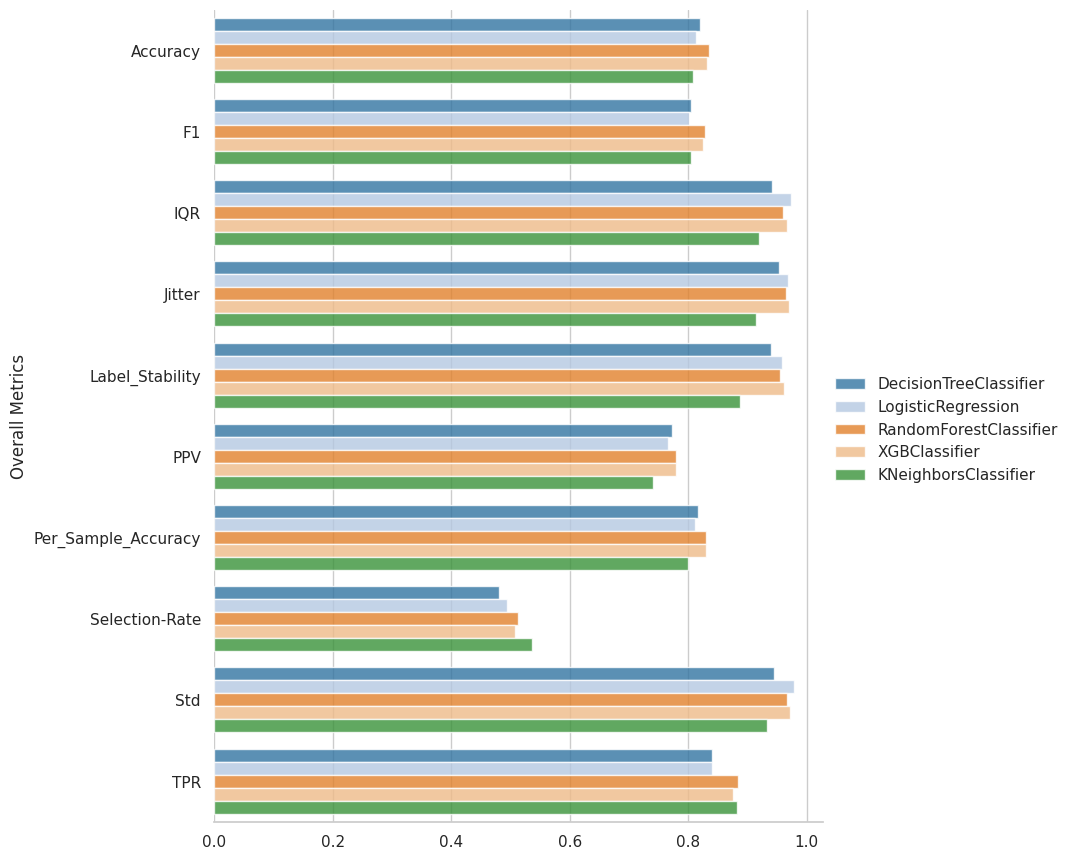

In [10]:
visualizer.visualize_overall_metrics(
    metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate',
                   'Per_Sample_Accuracy', 'Label_Stability'],
    reversed_metrics_names=['Std', 'IQR', 'Jitter'],
    x_label="Overall Metrics"
)

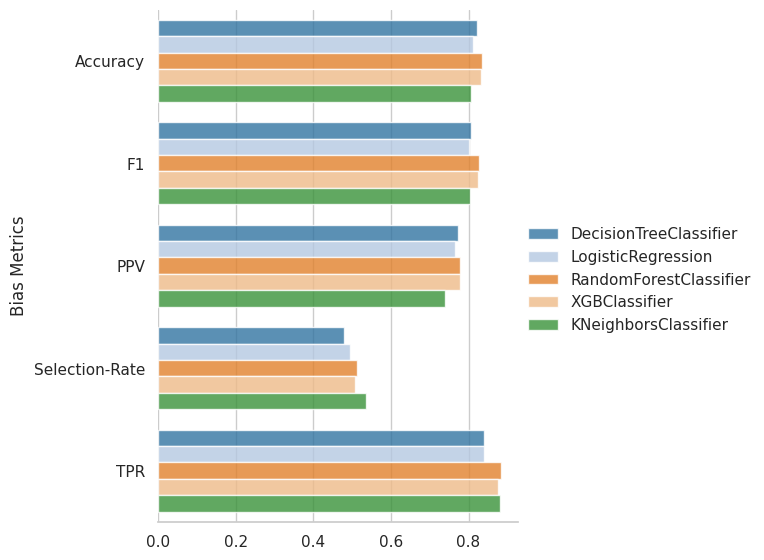

In [11]:
visualizer.visualize_overall_metrics(
    metrics_names=['TPR', 'PPV', 'Accuracy', 'F1', 'Selection-Rate'],
    x_label="Bias Metrics"
)

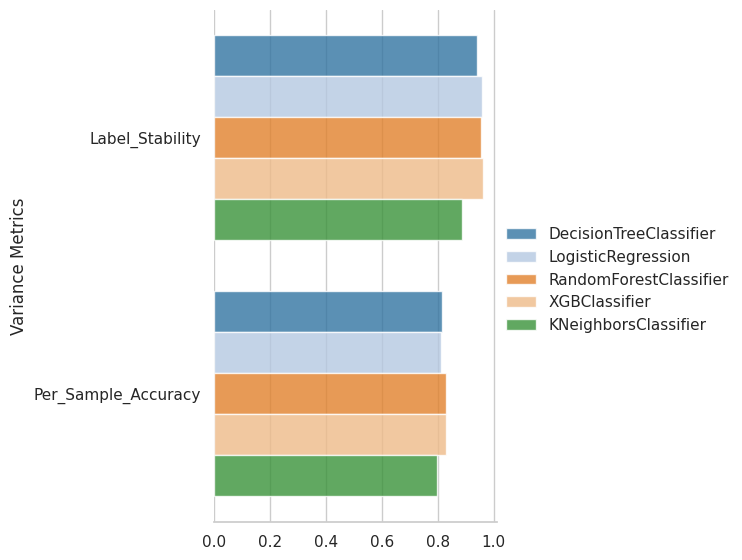

In [12]:
visualizer.visualize_overall_metrics(
    metrics_names=['Per_Sample_Accuracy', 'Label_Stability'],
    x_label="Variance Metrics"
)

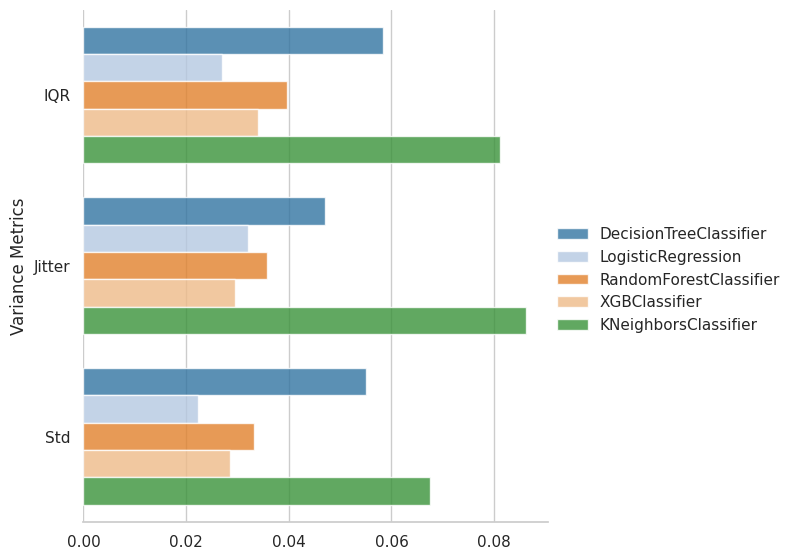

In [13]:
visualizer.visualize_overall_metrics(
    metrics_names=['Std', 'IQR', 'Jitter'],
    x_label="Variance Metrics"
)

In [14]:
visualizer.models_composed_metrics_df.head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name
0,Equalized_Odds_TPR,-0.012743,0.025157,0.010513,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.099807,0.005149,0.105041,DecisionTreeClassifier
2,Disparate_Impact,1.186251,1.072521,1.233786,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.186103,0.077146,0.226148,DecisionTreeClassifier
4,Accuracy_Parity,-0.063471,0.006297,-0.054889,DecisionTreeClassifier
5,Label_Stability_Ratio,0.973493,0.995263,0.969570,DecisionTreeClassifier
6,IQR_Parity,-0.004994,-0.002627,-0.006654,DecisionTreeClassifier
7,Std_Parity,-0.003123,-0.002352,-0.005256,DecisionTreeClassifier
8,Std_Ratio,0.944794,0.957824,0.908374,DecisionTreeClassifier
9,Jitter_Parity,0.020168,0.003789,0.023432,DecisionTreeClassifier


In [15]:
bias_metrics_lst = [
    'Accuracy_Parity',
    'Equalized_Odds_TPR',
    'Equalized_Odds_FPR',
    'Disparate_Impact',
    'Statistical_Parity_Difference',
]
models_bias_metrics_chart, select_bias_metric_legend, bias_color_legend = \
                visualizer.create_models_metrics_bar_chart(bias_metrics_lst, metrics_group_name="Bias")

In [16]:
variance_metrics_lst = [
    'IQR_Parity',
    'Label_Stability_Ratio',
    'Std_Parity',
    'Std_Ratio',
    'Jitter_Parity',
]
models_variance_metrics_chart, select_variance_metric_legend, variance_color_legend = \
                visualizer.create_models_metrics_bar_chart(variance_metrics_lst, metrics_group_name="Variance")

In [17]:
(
    alt.hconcat(
        alt.vconcat(
            select_bias_metric_legend.properties(height=200, width=50),
            select_variance_metric_legend.properties(height=200, width=50),
            bias_color_legend.properties(height=200, width=50),
        ),
        models_bias_metrics_chart.properties(height=200, width=300, title="Bias Metric Plot"),
        models_variance_metrics_chart.properties(height=200, width=300, title="Variance Metric Plot"),
    )
)

alt.HConcatChart(...)

In [18]:
models_average_results_df = visualizer.all_models_metrics_df

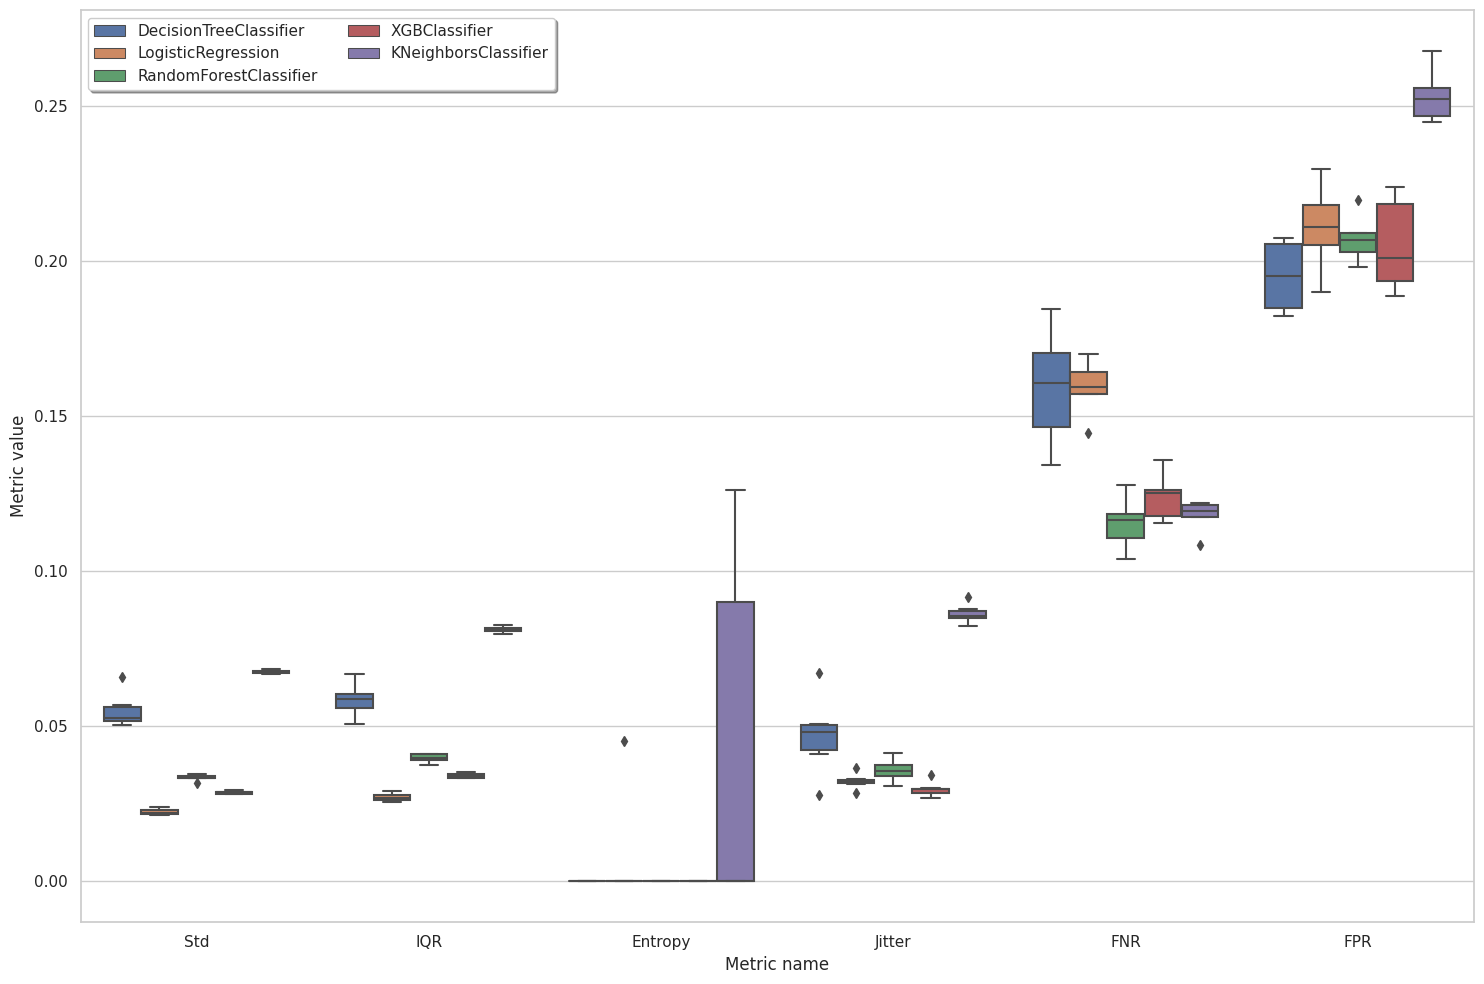

In [19]:
to_plot = models_average_results_df[models_average_results_df['Metric'].isin(['Std', 'IQR', 'Entropy', 'Jitter', 'FNR','FPR'])]

plt.figure(figsize=(15, 10))


sns.boxplot(x = to_plot['Metric'],
            y = to_plot['overall'],
            hue= to_plot['Model_Name'],
            #order=['Accuracy']
            #order=['Accuracy','TNR','TPR','FNR','FPR','Selection-Rate']
           )

plt.legend(loc='upper left',
          ncol=2, fancybox=True, shadow=True)
plt.xlabel("Metric name")
plt.ylabel("Metric value")
#plt.ylim(0,1)
#plt.title("Peformance on overall test set: "+experiment)

plt.tight_layout()

#plt.savefig(filename+'_overall.png', bbox_inches='tight')

In [20]:
sorted_models_composed_metrics_df = visualizer.melted_models_composed_metrics_df.sort_values(by=['Value'])

In [21]:
set(sorted_models_composed_metrics_df.Metric)

{'Accuracy_Parity',
 'Disparate_Impact',
 'Equalized_Odds_FPR',
 'Equalized_Odds_TPR',
 'IQR_Parity',
 'Jitter_Parity',
 'Label_Stability_Ratio',
 'Statistical_Parity_Difference',
 'Std_Parity',
 'Std_Ratio'}

In [22]:
def color_df(val):
    if val is 'RandomForestClassifier':
        color = 'pink' 
    if val is 'LogisticRegression':
        color = 'yellow'
    if val is 'DecisionTreeClassifier':
        color = 'cyan'
    if val is 'XGBClassifier':
        color = 'lightgreen'
    if val is 'KNeighborsClassifier':
        color = 'orange'
    if val is 'MLPClassifier':
        color = 'lightpurple'
    return 'background-color: %s' % color

In [23]:
results = {}

for metric in ['Disparate_Impact','Label_Stability_Ratio']:
    for subgroup in config.sensitive_attributes_dct.keys():
        key_name = metric + '_' + subgroup
        results[key_name] = sorted_models_composed_metrics_df[(sorted_models_composed_metrics_df.Metric == metric) & (sorted_models_composed_metrics_df.Subgroup == subgroup)]['Model_Name'].values
        
#pd.DataFrame(results).T
pd.DataFrame(results).T.style.applymap(color_df)

,0,1,2,3,4
Disparate_Impact_SEX,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Disparate_Impact_RAC1P,LogisticRegression,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier
Disparate_Impact_SEX&RAC1P,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Label_Stability_Ratio_SEX,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,XGBClassifier
Label_Stability_Ratio_RAC1P,DecisionTreeClassifier,XGBClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Label_Stability_Ratio_SEX&RAC1P,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,LogisticRegression


In [24]:
results = {}

for metric in ['Accuracy_Parity','Equalized_Odds_FPR','Statistical_Parity_Difference','IQR_Parity','Jitter_Parity','Std_Parity']:
    for subgroup in config.sensitive_attributes_dct.keys():
        key_name = metric + '_' + subgroup
        results[key_name] = sorted_models_composed_metrics_df[(sorted_models_composed_metrics_df.Metric == metric) & (sorted_models_composed_metrics_df.Subgroup == subgroup)]['Model_Name'].values

        
pd.DataFrame(results).T.style.applymap(color_df)

,0,1,2,3,4
Accuracy_Parity_SEX,RandomForestClassifier,DecisionTreeClassifier,XGBClassifier,LogisticRegression,KNeighborsClassifier
Accuracy_Parity_RAC1P,DecisionTreeClassifier,XGBClassifier,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
Accuracy_Parity_SEX&RAC1P,DecisionTreeClassifier,XGBClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Equalized_Odds_FPR_SEX,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Equalized_Odds_FPR_RAC1P,LogisticRegression,RandomForestClassifier,XGBClassifier,KNeighborsClassifier,DecisionTreeClassifier
Equalized_Odds_FPR_SEX&RAC1P,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Statistical_Parity_Difference_SEX,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
Statistical_Parity_Difference_RAC1P,LogisticRegression,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier,KNeighborsClassifier
Statistical_Parity_Difference_SEX&RAC1P,LogisticRegression,KNeighborsClassifier,XGBClassifier,RandomForestClassifier,DecisionTreeClassifier
IQR_Parity_SEX,DecisionTreeClassifier,LogisticRegression,XGBClassifier,RandomForestClassifier,KNeighborsClassifier
